# **Сети Колмогорова-Арнольда (KAN)**
---
## **1. Историческое развитие**

Теорему о представлении непрерывных функций нескольких переменных через суперпозиции непрерывных функций одной переменной и сложения, вставшую в основу KAN, сформулировал Андрей Колмогоров в 1957 году. В 1963 году Владимир Арнольд уточнил представление Колмогорова, показав, как именно можно построить функции от одной переменной, тем самым Арнольд придал теореме Колмогорова практическую форму. Именно этот результат стал известен как теорема Колмогорова-Арнольда.

Эта теорема, сформулированная в середине XX века, долгое время считалась теоретически значимой, но практически бесполезной из-за сложности реализации и негладкости внутренних функций, значительно усложняющих обучение.

---

## **2. Математические основы**

### **2.1 Теорема Колмогорова-Арнольда**

Из теоремы Колмогорова-Арнольда следует, что если $f$ — многомерная непрерывная функция в ограниченной области, то $f$ можно записать как конечную композицию непрерывных функций одной переменной и бинарной операции сложения следующим образом: $$f(x_1, \dots, x_n) = \sum_{q=1}^{2n+1} \Phi_q \left( \sum_{p=1}^{n} \phi_{q,p}(x_p) \right)
$$

### **2.2 Проблемы теоремы Колмогорова-Арнольда**

Теорему до недавнего времени не рассматривали в качестве основы для создания нейронных сетей по двум причинам:

1. **Негладкость одномерных функций.**
Теорема предполагает разложение многомерной функции на суперпозицию одномерных, но эти одномерные функции могут быть негладкими. Это делает невозможным применение метода обратного распространения ошибки (backpropagation), который требует дифференцируемости функций.

2. **Жёсткая фиксация структуры.**
В оригинальной теореме архитектура сети строго ограничена: всего два слоя и $2n + 1$ нейронов в скрытом слое (где $n$ — размерность входных данных). Такая структура слишком проста для большинства практических задач и не обладает гибкостью, необходимой для адаптации к сложным данным.

### **2.3 Решение проблем теоремы Колмогорова-Арнольда в KAN**

1. **B-сплайны.** Вместо произвольных функций KAN используют гладкие B-сплайны для представления активационных функций. Это гарантирует их дифференцируемость и позволяет применять современные методы обучения. Каждая активационная функция имеет вид:

$$
\phi(x) = w_b \cdot b(x) + w_s \cdot \mathrm{spline}(x)
$$,

$b(x)$ - базовая гладкая функция, $\mathrm{spline}(x)$ - линейная комбинация B-сплайнов:

$$
\mathrm{spline}(x) = \sum_{i} c_i B_i(x)
$$

2. **Глубокая композиция.** KAN вводят понятие слоя как матрицы функций:

$$
Φ_l = \{\phi_{l,j,i}\}, \quad i = 1..n_{in}, \quad j = 1.n_{out}
$$

где $\phi_{l,j,i}$ - обучаемая 1D функция параметризованная сплайном.

Выход KAN вычисляется как композиция L таких слоев:

$$
\text{KAN}(\mathbf{x}) = \left( \Phi_{L-1} \circ \Phi_{L-2} \circ \cdots \circ \Phi_0 \right) \mathbf{x}
$$

Что также можно нагляднее представить как:

$$
f(\mathbf{x}) = \sum_{i_{L-1}} \phi_{L-1, i_L, i_{L-1}} \left(
    \sum_{i_{L-2}} \cdots \left(
        \sum_{i_1} \phi_{1, i_2, i_1} \left(
            \sum_{i_0} \phi_{0, i_1, i_0}(x_{i_0})
        \right)
    \right) \cdots
\right)
$$

---

## **3. Основная структура**


### **3.1 Представление слоев**
Архитектура задается списком:

$$
[n_0, n_1, \dots, n_L]
$$

где $n_l$ - количество нейронов в слое $l$.

### **3.2 Функция активации**
Каждая связь между нейронами $(l, i)$ и $(l + 1, j)$ имеет свою функцию активации:

$$
\phi_{l,j,i}: ℝ → ℝ
$$

Параметризованную как:

$$
\phi_{l,j,i}(x) = w_b \cdot b(x) + w_s \cdot \mathrm{spline}(x)
$$

### **3.3 Вычисления в слое**

Выход нейрона (в данном случае нейрона $(l +1, j)$) вычисляется как сумма входящих в него функций:

$$
x_{l+1, j} = \sum_{i=1}^{n_l}\phi_{l,j,i}(x_{l, i})
$$

Если выражать это в матричной форме:

$$
x_{l+1} = Φ_lx_l
$$

где - функциональная матрица:

$$
\Phi_l =
\begin{bmatrix}
\phi_{l,1,1} & \cdots & \phi_{l,1,n_l} \\
\vdots & \ddots & \vdots \\
\phi_{l,n_{l+1},1} & \cdots & \phi_{l,n_{l+1},n_l}
\end{bmatrix}
$$

### **3.4 Полная сеть**

Полная сеть уже была описана выше и выглядит следующим образом:

$$
\text{KAN}(\mathbf{x}) = \left( \Phi_{L-1} \circ \Phi_{L-2} \circ \cdots \circ \Phi_0 \right) \mathbf{x}
$$

Или в другой форме:

$$
f(\mathbf{x}) = \sum_{i_{L-1}} \phi_{L-1, i_L, i_{L-1}} \left(
    \sum_{i_{L-2}} \cdots \left(
        \sum_{i_1} \phi_{1, i_2, i_1} \left(
            \sum_{i_0} \phi_{0, i_1, i_0}(x_{i_0})
        \right)
    \right) \cdots
\right)
$$

---

## 4. **Сравнение KAN с MLP**

Многослойные перцептроны долгое время остаются стандартом для аппроксимации нелинейных функций в глубоком обучении. Благодаря универсальной теореме аппроксимации и простоте реализации, MLP легли в основу практически всех современных нейросетевых архитектур.

### 4.1 **Функции активации**
- **MLP**: Нелинейные функции активации (ReLU, tanh, сигмоида и т.д.) одинаковые для всего слоя, расположены на узлах.
- **KAN**: 	Обучаемые нелинейные B-сплайны разные для каждого входа, расположены на ребрах.

### 4.2 **Параметризация**
- **MLP**:
  - Линейные веса: $W \in \mathbb{R}^{n_{l+1} \times n_l}$
  - Фиксированные активации: $\sigma(Wx + b)$
- **KAN**:
  - Обучаемые функции: $\phi_{l,j,i}(x) = w_b b(x) + w_s \text{spline}(x)$
  - Нет линейных весов - только параметры сплайнов

### 4.3 **Стратегия аппроксимации**

* **MLP**: Глобальная аппроксимация — каждый нейрон участвует в формировании всего выходного пространства, обучение распределяет информацию по всей сети.
* **KAN**: Локальная аппроксимация — B-сплайны действуют в ограниченных интервалах, что позволяет точно аппроксимировать функции с локальными особенностями.

### 4.4 **Метод обучения**

* **MLP**: Сквозное обучение (end-to-end) методом обратного распространения ошибки (backpropagation).
* **KAN**: Также используется backpropagation, благодаря дифференцируемости сплайнов.

### 4.5 **Скорость обучения**

* **MLP**: Обычно быстрее обучается благодаря простоте операций и хорошо проработанным оптимизаторам.
* **KAN**: Медленнее из-за более сложной архитектуры и численно затратных операций со сплайнами.

### 4.6 **Размер и вычислительная эффективность**

* **MLP**: Требует больше параметров, но оптимален по числу FLOPs (Floating Point Operations).
* **KAN**: Для достижения сопоставимой точности требует меньше параметров, но больше вычислений из-за стоимости сплайнов (больше FLOPs на одно соединение).

### 4.7 **Интерпретируемость**

* **MLP**: Низкая — веса и активации сложно интерпретировать, особенно в глубоких сетях.
* **KAN**: Выше — каждая функция на ребре явно задана (например, через B-сплайн), что позволяет анализировать вклад каждого входа в выход.

---

## **5. Методология обучения KAN**

Обучение KAN строится на тех же принципах, что и обучение классических нейросетей, но с рядом особенностей, связанных с обучаемыми функциями активации и нестандартной структурой параметров.

### **5.1 Инициализация параметров**

Обучение начинается с случайной инициализации параметров сети. В отличие от MLP, где инициализируются веса и смещения, в KAN инициализируются:

* коэффициенты B-сплайнов,
* весовые коэффициенты линейной составляющей (если используется),

### **5.2 Прямой и обратный проход**

Процесс обучения включает два этапа:

1. **Прямой проход (forward pass)**: входные данные проходят через сеть, на каждом ребре применяются индивидуальные B-сплайны, результат агрегируется и формирует выход модели.
2. **Обратный проход (backward pass)**: вычисляется ошибка между предсказанием и истинной меткой, после чего с помощью правила цепочки (chain rule) дифференцирования вычисляются градиенты по всем параметрам.

Параметры обновляются с помощью стандартных методов оптимизации, таких как градиентный спуск, стохастический градиентный спуск (SGD), Adam и т.д.

### **5.3 Проблемы стабильности и регуляризация**

Одной из ключевых сложностей при обучении KAN является обеспечение стабильности и сходимости процесса оптимизации. Это связано с тем, что обучаемые функции активации (B-сплайны) имеют сложную зависимость от параметров и могут вызывать переобучение или нестабильные градиенты.

Для решения этих проблем применяются похожие с MLP методы:

* **Dropout** — для предотвращения переобучения;
* **Weight decay** — для ограничения роста параметров;
* **Batch normalization** и **Layer normalization** — для стабилизации распределений активаций и ускорения сходимости.

### **5.4 Сквозное обучение**

KAN поддерживают сквозное (end-to-end) обучение, при котором все параметры сети обучаются одновременно. Поддержка backpropagation и end-to-end обучения позволяет интегрировать KAN в современные фреймворки глубокого обучения (например, PyTorch), использовать его вместе с другими архитектурными блоками (CNN, Transformer) и обучать модель без ручной настройки отдельных этапов.

---

## **6. Практические применения**

KAN демонстрируют высокую точность и эффективность в ряде задач, где требуется точная аппроксимация, сохранение информации и компактность модели.
Далее будут представлены результаты экспериментов из статьи KAN: Kolmogorov–Arnold Networks (https://arxiv.org/pdf/2404.19756).

### **6.1 Аппроксимация аналитических и символьных функций**

KAN превосходно подходят для символьной регрессии — задачи восстановления математической формулы по точкам. В экспериментах:

* KAN с тем же количеством параметров, что и MLP, достигали меньших ошибок на обучении и тесте.
* Особенно заметно преимущество при увеличении размерности входов и усложнении функции: глубокие KAN масштабируются лучше, чем глубокие MLP.

### **6.2 Приближение специальных функций**

KAN эффективно аппроксимируют специальные математические функции, широко используемые в физике и инженерии (например, функции Бесселя, Лежандра и сферические гармоники).

* В тесте на 15 таких функций KAN показали устойчиво меньшую ошибку на обучении и тесте, чем MLP, при одинаковом числе параметров.
* Компактные структуры KAN обеспечивали точность, сопоставимую с MLP, в которых было в десятки и сотни раз больше параметров.

### **6.3 Решение дифференциальных уравнений (PDE)**

KAN демонстрируют впечатляющую эффективность в задачах численного решения уравнений в частных производных:

* KAN с 2 слоями шириной 10 показали точность $10^{-7}$,
* В то время как MLP с 4 слоями шириной 100 достигали только $10^{-5}$,
* При этом KAN использовал в 100 раз меньше параметров.

### **6.4 Continual Learning**

KAN устойчивы к проблеме катастрофического забывания, благодаря своей локальной природе B-сплайнов:

* При обучении новому примеру изменяются только локальные участки B-сплайнов.
* Остальные части сети остаются нетронутыми — сеть сохраняет ранее выученные знания.
* В отличие от MLP, где обновления могут влиять на весь выход, в KAN правки минимальны и изолированы.

Это делает их подходящими для задач, где данные приходят поэтапно, как в обучении на потоке данных или в реальных временных системах.

### **6.5 Компактные модели для сложных задач**

Как уже было представлено в экспериментах выше, KAN больше всего выигрывает в требовательности к числу параметров:

* KAN с 200 параметрами достиг 81.6% точности в задаче предсказания геометрического инварианта узлов (knot classification),
* В то время как модель от Google DeepMind (MLP с \~300,000 параметров) — только 78% точности.

Это подчёркивает высокую параметрическую эффективность KAN.

---

## **7. Сильные и слабые стороны**

### **7.1 Сильные стороны**

- **Высокая выразительная способность**

KAN эффективно аппроксимируют сложные математические зависимости и специальные функции даже при малом числе параметров. Их обучаемые B-сплайны позволяют точно передавать локальные особенности функций.

- **Параметрическая эффективность**

Для достижения той же точности, что и MLP, KAN требует в десятки или сотни раз меньше параметров.

- **Интерпретируемость**

Каждая связь в KAN представлена явной функцией, что позволяет анализировать, какой именно вход как влияет на выход, в отличие от "черного ящика" в MLP.

- **Обучение без забывания (continual learning)**

Локальная природа сплайнов позволяет KAN сохранять ранее выученные знания, не разрушая их при обучении на новых данных. Это делает модель устойчивой к катастрофическому забыванию.

### **7.2 Слабые стороны**

- **Сложность обучения**

Обучение KAN требует аккуратной настройки: неправильная инициализация, слишком высокий learning rate или плохая структура сплайна могут привести к нестабильности или затуханию градиентов.

- **Более высокая вычислительная стоимость (FLOPs)**

Хотя число параметров у KAN меньше, число операций (FLOPs) больше, чем у MLP. Это делает KAN медленнее в задачах, где важна скорость, особенно на GPU.

- **Недостаток фреймворков и библиотек**

KAN пока не так широко распространены, как MLP. Поддержка во фреймворках ограничена, а автоматический подбор архитектур и оптимизация только развивается.

- **Недостаток практических исследований**

По сетям Колмогорова-Арнольда на данный момент мало исследований, при этом некоторые из них противоречат друг другу в результатах экспериментов. К примеру, в оригинальной статье [1] в плюс KAN ставится continual learning и устойчивость к забыванию, но в более поздней статье [2] указывается на то, что в таких задачах как, например, CV, KAN в contunual learning наоборот проявляет себя хуже, чем MLP.

---

## **8. Перспективы развития KAN**

Сети Колмогорова-Арнольда стали активно развивать в 2024 году, после публикации статьи [1], в которой были преодолены основные проблемы из пункта 2.2. В данный момент исследований на эту тему недостаточно, но уже можно выделить основные векторы развития и проблемы, которые нужно будет решить.

### **8.1 Расширение прикладных областей**

Хотя KAN показали отличные результаты в задачах аппроксимации аналитических функций, символьной регрессии и решения уравнений в частных производных, дальнейшее развитие требует их адаптации к более прикладным областям, включая компьютерное зрение, обработку естественного языка и табличные данные. Уже начались попытки встраивания KAN в визуальные архитектуры (например, Vision-KAN [3] и U-KAN [4]).

### **8.2 Совершенствование обучения**

Одним из препятствий для широкого применения KAN остаются сложности в обучении: высокая вычислительная стоимость и нестабильность градиентов. Перспективным направлением является развитие более устойчивых оптимизационных подходов, включая гибридные схемы (например, чередование Adam и LBFGS, предложенное в [1]) и автоматическую настройку структуры сплайнов.

Также может быть полезным использование техник из области нейроэволюции или нейроархитектурного поиска (NAS) для автоматического подбора формы KAN и оптимального распределения контрольных точек.

### **8.3 Интерпретируемость и научные применения**

KAN демонстрируют потенциал как инструмент объяснимого машинного обучения (XAI). Возможность анализировать каждую обученную функцию на ребре делает KAN привлекательными для приложений в науке и инженерии, где важно понимать, как модель пришла к выводу. Исследования компактных представлений специальных функций открывают возможности для использования KAN как инструмента автоматического поиска символических выражений или даже новых математических закономерностей.

---

## Заключение

Сети Колмогорова-Арнольда представляют собой перспективную архитектуру, сочетающую в себе гибкость, интерпретируемость и высокую точность аппроксимации. Использование обучаемых B-сплайнов на уровне соединений позволяет KAN уже превосходить классические MLP в некоторых задачах. Однако сети Колмогорова-Арнольда имеют много весомых недостатков, более того, несмотря на успехи первых работ, теоретическая база и практический опыт пока очень ограничены — многие заявленные преимущества нуждаются в подтверждении в более широком спектре прикладных задач и при использовании современных методов обучения. Тем не менее, потенциал KAN очевиден.

## **Источники**

[1] Liu, Z. (2024). Kolmogorov–Arnold Networks (KANs). arXiv:2404.19756

[2] Runpeng Yu, Weihao Yu, and Xinchao Wang (2024). KAN or MLP: A Fairer Comparison. arXiv:2407.16674

[3] Chenziwen Haoshuai. (2024). Vision-KAN. GitHub repository. https://github.com/chenziwenhaoshuai/Vision-KAN

[4] Gu, W., Wang, X., & Yu, R. (2024). U-KAN makes strong backbone for medical image segmentation and generation. arXiv preprint, arXiv:2406.02918

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_friedman2, make_circles, make_friedman3

In [2]:
class KANNetwork(nn.Module):
    def __init__(self, n_neurons=5, num_control_points=20, degree=2, input_dim=1, output_dim=1, max_epochs=100, animation_interval=5):
        super(KANNetwork, self).__init__()
        self.n_neurons = n_neurons
        self.num_control_points = num_control_points
        self.degree = degree
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.max_epochs = max_epochs
        self.animation_interval = animation_interval
        self.scaler = StandardScaler()
        self.training_history = []

        self.knot_range = (-1, 1)
        self.splines = nn.ModuleList([
            self.BSpline(num_control_points, degree, self.knot_range) for _ in range(n_neurons)
        ])
        self.linear = nn.Linear(n_neurons * input_dim, output_dim)

    class BSpline(nn.Module):
        def __init__(self, num_control_points=20, degree=2, knot_range=(-1, 1)):
            super().__init__()
            self.num_control_points = num_control_points
            self.degree = degree
            self.control_points = nn.Parameter(torch.randn(num_control_points))
            knots = torch.linspace(knot_range[0], knot_range[1], num_control_points + degree + 1)
            self.register_buffer('knots', knots)

        def basis_function(self, x, knot_idx, degree):
            if degree == 0:
                return ((self.knots[knot_idx] <= x) & (x < self.knots[knot_idx + 1])).float()
            denom_left = self.knots[knot_idx + degree] - self.knots[knot_idx]
            denom_right = self.knots[knot_idx + degree + 1] - self.knots[knot_idx + 1]
            if denom_left < 1e-10:
                left = torch.zeros_like(x)
            else:
                left = (x - self.knots[knot_idx]) / denom_left
            if denom_right < 1e-10:
                right = torch.zeros_like(x)
            else:
                right = (self.knots[knot_idx + degree + 1] - x) / denom_right
            return (left.clamp(0, 1) * self.basis_function(x, knot_idx, degree - 1) +
                    right.clamp(0, 1) * self.basis_function(x, knot_idx + 1, degree - 1))

        def forward(self, x):
            result = torch.zeros_like(x)
            for i in range(self.num_control_points):
                basis_val = self.basis_function(x, i, self.degree)
                result += self.control_points[i] * basis_val
            mask_left = x < self.knots[0]
            mask_right = x > self.knots[-1]
            if mask_left.any():
                result[mask_left] = self.control_points[0] * self.basis_function(x[mask_left], 0, self.degree)
            if mask_right.any():
                result[mask_right] = self.control_points[-1] * self.basis_function(x[mask_right], self.num_control_points - 1, self.degree)
            return result

    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = torch.tensor(self.scaler.transform(x), dtype=torch.float32)
        activations = []
        for i in range(self.input_dim):
            x_i = x[:, i]
            spline_outputs = torch.stack([spline(x_i) for spline in self.splines], dim=1)
            activations.append(spline_outputs)
        activations = torch.cat(activations, dim=1)
        output = self.linear(activations)
        return output

    def fit(self, X, y, epochs=None, lr=0.01, animate=False, l2_lambda=1e-4):
        X_min, X_max = X.min(), X.max()
        self.knot_range = (X_min - 0.5, X_max + 0.5)
        for spline in self.splines:
            spline.knots = torch.linspace(self.knot_range[0], self.knot_range[1],
                                        spline.num_control_points + spline.degree + 1)

        self.scaler.fit(X)
        X_scaled = torch.tensor(self.scaler.transform(X), dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        criterion = nn.MSELoss()
        epochs = epochs or self.max_epochs
        self.training_history = []

        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(X_scaled)
            loss = criterion(output, y)
            l2_reg = 0
            for spline in self.splines:
                l2_reg += torch.norm(spline.control_points, p=2)
            loss += l2_lambda * l2_reg
            loss.backward()
            optimizer.step()

            if animate and (epoch % self.animation_interval == 0 or epoch == epochs - 1):
                with torch.no_grad():
                    # Сохраняем предсказания для x_range, а не для X
                    x_range = np.linspace(X.min() - 0.5, X.max() + 0.5, 300).reshape(-1, 1)
                    x_range_scaled = torch.tensor(self.scaler.transform(x_range), dtype=torch.float32)
                    y_pred = self(x_range_scaled).detach().numpy()
                    mse = float(loss.item())
                    self.training_history.append({
                        'epoch': epoch,
                        'y_pred': y_pred,  # Предсказания для x_range
                        'mse': mse
                    })

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            X_scaled = torch.tensor(self.scaler.transform(X), dtype=torch.float32)
            return self(X_scaled).numpy()

    def calculate_metrics(self, y_true, y_pred):
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot != 0 else 0
        nrmse = rmse / (y_true.max() - y_true.min()) if y_true.max() != y_true.min() else 0
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if not np.any(y_true == 0) else np.inf
        mdape = np.median(np.abs((y_true - y_pred) / y_true)) * 100 if not np.any(y_true == 0) else np.inf
        max_error = np.max(np.abs(y_true - y_pred))
        return {
            'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2,
            'nrmse': nrmse, 'mape': mape, 'mdape': mdape, 'max_error': max_error
        }

    def visualize_spline_functions(self, X, feature_names=None, X_train=None, y_train=None):
        self.eval()
        if feature_names is None:
            feature_names = [f'X{i+1}' for i in range(X.shape[1])]

        if X.shape[1] == 1:
            plt.figure(figsize=(12, 8))
            x_range = np.linspace(X.min() - 0.5, X.max() + 0.5, 300).reshape(-1, 1)
            x_scaled = torch.tensor(self.scaler.transform(x_range), dtype=torch.float32)

            plt.subplot(2, 1, 1)
            if X_train is not None and y_train is not None:
                plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Обучающие данные')
            with torch.no_grad():
                y_pred = self(x_scaled).detach().numpy()
            plt.plot(x_range, y_pred, 'r-', linewidth=2, label='Предсказание KAN')
            plt.title('Аппроксимация KAN')
            plt.xlabel(feature_names[0])
            plt.ylabel('Y')
            plt.legend()
            plt.grid(True)

            plt.subplot(2, 1, 2)
            with torch.no_grad():
                for i, spline in enumerate(self.splines):
                    spline_output = spline(x_scaled[:, 0]).detach().numpy()
                    plt.plot(x_range, spline_output, alpha=0.7, label=f'Сплайн {i+1}')
            plt.title('B-сплайн функции')
            plt.xlabel(feature_names[0])
            plt.ylabel('Активация')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        elif X.shape[1] == 2:
            fig = plt.figure(figsize=(15, 5))
            x1_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 50)
            x2_range = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 50)
            x1, x2 = np.meshgrid(x1_range, x2_range)
            X_grid = np.column_stack([x1.ravel(), x2.ravel()])
            x_scaled = torch.tensor(self.scaler.transform(X_grid), dtype=torch.float32)

            ax = fig.add_subplot(131, projection='3d')
            with torch.no_grad():
                y_pred = self(x_scaled).detach().numpy().reshape(x1.shape)
            ax.plot_surface(x1, x2, y_pred, cmap='viridis', alpha=0.8)
            if X_train is not None and y_train is not None:
                ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='red', label='Обучающие данные')
            ax.set_title('Аппроксимация KAN')
            ax.set_xlabel(feature_names[0])
            ax.set_ylabel(feature_names[1])
            ax.set_zlabel('Y')
            ax.legend()

            for i, spline in enumerate(self.splines[:2]):
                ax = fig.add_subplot(132 + i, projection='3d')
                with torch.no_grad():
                    spline_output = spline(x_scaled[:, 0]).detach().numpy().reshape(x1.shape)
                ax.plot_surface(x1, x2, spline_output, cmap='plasma', alpha=0.8)
                ax.set_title(f'Сплайн {i+1}')
                ax.set_xlabel(feature_names[0])
                ax.set_ylabel(feature_names[1])
                ax.set_zlabel('Активация')
            plt.tight_layout()
            plt.show()

    def get_spline_outputs(self, X):
        self.eval()
        X_scaled = torch.tensor(self.scaler.transform(X), dtype=torch.float32)
        outputs = []
        with torch.no_grad():
            for spline in self.splines:
                output = spline(X_scaled[:, 0]).detach().numpy()
                outputs.append(output)
        return outputs

    def animate_training(self, X, y, interval=200):
        fig, ax = plt.subplots(figsize=(10, 6))
        x_range = np.linspace(X.min() - 0.5, X.max() + 0.5, 300).reshape(-1, 1)
        y_true = y.flatten()
        line, = ax.plot([], [], 'r-', label='Предсказание KAN')
        ax.scatter(X, y_true, alpha=0.6, color='blue', label='Обучающие данные')
        ax.set_xlim(X.min() - 0.5, X.max() + 0.5)
        ax.set_ylim(y_true.min() - 0.5, y_true.max() + 0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend()
        ax.grid(True)
        text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

        def init():
            line.set_data([], [])
            return line,

        def update(frame):
            history = self.training_history[frame]
            y_pred = history['y_pred'].flatten()  # Предсказания уже для x_range
            mse = history['mse']
            epoch = history['epoch']
            sort_idx = np.argsort(x_range.flatten())
            line.set_data(x_range[sort_idx], y_pred[sort_idx])
            text.set_text(f'Epoch: {epoch}, MSE: {mse:.6f}')
            return line, text

        ani = FuncAnimation(fig, update, frames=len(self.training_history),
                            init_func=init, blit=True, interval=interval)
        return ani

In [3]:
def experiment_with_kan(X, y, n_neurons_list, n_control_points_list, X_train=None, y_train=None):
    """
    Проводит эксперименты с разными параметрами KAN-сети

    Parameters:
    - X: Обучающие данные (n_samples, n_features)
    - y: Целевые значения (n_samples,)
    - n_neurons_list: Список чисел нейронов в скрытом слое
    - n_control_points_list: Список чисел контрольных точек для B-сплайнов
    - X_train: Тренировочные данные (опционально, для вычисления ошибки)
    - y_train: Тренировочные целевые значения (опционально)

    Returns:
    - pd.DataFrame с результатами экспериментов
    """
    results = []

    for n_neurons in n_neurons_list:
        for n_control_points in n_control_points_list:
            # Создаем и обучаем модель
            model = KANNetwork(n_neurons=n_neurons, num_control_points=n_control_points, degree=3)
            model.fit(X, y)

            # Вычисляем ошибки
            train_pred = model.predict(X)
            train_mse = np.mean((train_pred.flatten() - y.flatten()) ** 2)

            result = {
                'n_neurons': n_neurons,
                'n_control_points': n_control_points,
                'train_mse': train_mse
            }

            # Если есть тренировочные данные
            if X_train is not None and y_train is not None:
                test_pred = model.predict(X_train)
                test_mse = np.mean((test_pred.flatten() - y_train.flatten()) ** 2)
                result['test_mse'] = test_mse

            results.append(result)

    # Создаем DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def visualize_experiment_results(results_df, test_data_available=False):
    """
    Визуализирует результаты экспериментов с KAN

    Parameters:
    - results_df: DataFrame с результатами экспериментов
    - test_data_available: bool, указывает, есть ли тестовые данные
    """
    n_neurons_list = sorted(results_df['n_neurons'].unique())
    n_control_points_list = sorted(results_df['n_control_points'].unique())

    # Создаем фигуру
    fig, ax = plt.subplots(1, 2 if test_data_available else 1, figsize=(16, 8 if test_data_available else 6))
    ax = [ax] if not test_data_available else ax

    # График зависимости ошибки от числа нейронов
    for n_points in n_control_points_list:
        subset = results_df[results_df['n_control_points'] == n_points]
        ax[0].plot(subset['n_neurons'], subset['train_mse'], 'o-', label=f'Control Points={n_points}')

    ax[0].set_xlabel('Число нейронов')
    ax[0].set_ylabel('MSE на обучающей выборке')
    ax[0].set_title('Зависимость ошибки от числа нейронов')
    ax[0].legend()
    ax[0].grid(True)

    if test_data_available:
        # График сравнения ошибок
        for n_points in n_control_points_list:
            subset = results_df[results_df['n_control_points'] == n_points]
            ax[1].plot(subset['n_neurons'], subset['train_mse'], 'o-', label=f'Train, CP={n_points}')
            ax[1].plot(subset['n_neurons'], subset['test_mse'], 'x--', label=f'Test, CP={n_points}')

        ax[1].set_xlabel('Число нейронов')
        ax[1].set_ylabel('MSE')
        ax[1].set_title('Сравнение обучающей и тестовой ошибок')
        ax[1].legend()
        ax[1].grid(True)

    plt.tight_layout()
    plt.show()

def generate_demo_data(n_samples=100, noise=0.1, func_type='sin'):
    """
    Генерирует демонстрационные данные для KAN-сети

    Parameters:
    - n_samples: Количество точек
    - noise: Уровень шума
    - func_type: Тип функции ('sin', 'exp', 'quadratic', '2d', 'classification', 'complex')

    Returns:
    - X: Входные данные
    - y: Целевые значения
    """
    if func_type == 'sin':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'exp':
        X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
        y = np.exp(-X.flatten()**2) + noise * np.random.randn(n_samples)
    elif func_type == 'quadratic':
        X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 - 1.5 * X.flatten() + 2 + noise * np.random.randn(n_samples)
    elif func_type == '2d':
        X, y = make_friedman2(n_samples=n_samples, noise=noise, random_state=42)
        X = X[:, :2]  # Ограничиваем до 2 признаков
    elif func_type == 'classification':
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    else:  # complex
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2) + noise * np.random.randn(n_samples)

    return X, y

def generate_advanced_demo_data(n_samples=200, noise=0.1, func_type='multimodal'):
    """
    Генерирует сложные демонстрационные данные для KAN-сети

    Parameters:
    - n_samples: Количество точек
    - noise: Уровень шума
    - func_type: Тип функции ('multimodal', 'discontinuous', 'multidimensional', 'noisy_peaks', 'complex_3d')

    Returns:
    - X: Входные данные
    - y: Целевые значения
    """
    if func_type == 'multimodal':
        X = np.linspace(-8, 8, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + 0.5 * np.sin(3 * X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'discontinuous':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.zeros(n_samples)
        mask1 = X.flatten() < -2
        mask2 = (X.flatten() >= -2) & (X.flatten() < 1)
        mask3 = X.flatten() >= 1
        y[mask1] = -1 + noise * np.random.randn(np.sum(mask1))
        y[mask2] = np.sin(X.flatten()[mask2] * 2) + noise * np.random.randn(np.sum(mask2))
        y[mask3] = 1 + 0.5 * np.sin(X.flatten()[mask3]) + noise * np.random.randn(np.sum(mask3))
    elif func_type == 'multidimensional':
        X, y = make_friedman3(n_samples=n_samples, noise=noise, random_state=42)
        X = X[:, :3]  # Ограничиваем до 3 признаков
    elif func_type == 'noisy_peaks':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        base = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2)
        peaks = np.zeros(n_samples)
        for _ in range(10):
            pos = np.random.randint(0, n_samples)
            width = np.random.randint(5, 20)
            height = np.random.uniform(1, 3)
            start = max(0, pos - width // 2)
            end = min(n_samples, pos + width // 2)
            peaks[start:end] = height * np.exp(-0.5 * ((np.arange(start, end) - pos) / (width / 5))**2)
        y = base + peaks + noise * np.random.randn(n_samples)
    elif func_type == 'complex_3d':
        x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        xx, yy = np.meshgrid(x, y)
        X = np.column_stack([xx.ravel(), yy.ravel()])
        z = np.sin(np.sqrt(xx**2 + yy**2)) + 0.1 * xx * yy + np.exp(-0.1 * (xx**2 + yy**2)) * np.cos(xx * yy)
        y = z.ravel() + noise * np.random.randn(X.shape[0])
    else:
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 + np.sin(X.flatten() * 3) + noise * np.random.randn(n_samples)

    return X, y

def visualize_metrics(metrics_dict, title="Метрики качества аппроксимации KAN"):
    """
    Визуализирует метрики качества в виде графика

    Parameters:
    - metrics_dict: Словарь с метриками
    - title: Заголовок графика
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    metrics = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    bars = ax.bar(metrics, values, color='skyblue')

    for bar in bars:
        height = bar.get_height()
        if height < 1e-10:
            ax.text(bar.get_x() + bar.get_width()/2., 0.01, f'{height:.2e}',
                    ha='center', va='bottom', rotation=45)
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(values),
                    f'{height:.4f}', ha='center', va='bottom')

    ax.set_title(title)
    ax.set_ylabel('Значение')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [4]:
def demo_kan_formation():
    """
    Демонстрация формирования B-сплайн функций в KAN-сети
    с подробными объяснениями для образовательных целей
    """
    print("ДЕМОНСТРАЦИЯ: Формирование B-сплайн функций в KAN")
    print("=" * 60)
    print("Эта демонстрация покажет, как KAN-сеть создает и использует")
    print("B-сплайн функции для аппроксимации данных.\n")

    # === 1D ДЕМОНСТРАЦИЯ ===
    print("ЧАСТЬ 1: ОДНОМЕРНЫЙ СЛУЧАЙ (1D)")
    print("-" * 40)

    X, y = generate_demo_data(n_samples=100, noise=0.1, func_type='sin')

    print(f"✓ Создано {len(X)} точек данных")
    print(f"✓ Диапазон X: от {X.min():.2f} до {X.max():.2f}")
    print(f"✓ Диапазон Y: от {y.min():.2f} до {y.max():.2f}")

    print("\nСоздаем KAN-сеть")
    model = KANNetwork(n_neurons=5, num_control_points=20, degree=2, input_dim=1)
    print(f"✓ Конфигурация: {model.n_neurons} нейронов, {model.num_control_points} контрольных точек")

    print("\nОбучаем модель")
    model.fit(X, y, epochs=500, animate=True)

    print("\nВизуализируем B-сплайн функции с обучающими данными")
    model.visualize_spline_functions(X, feature_names=['X'], X_train=X, y_train=y)

    # === 2D ДЕМОНСТРАЦИЯ ===
    print("\n" + "=" * 60)
    print(" ЧАСТЬ 2: ДВУМЕРНЫЙ СЛУЧАЙ (2D)")
    print("-" * 40)

    print("Генерируем 2D данные для регрессии")
    X_2d, y_2d = generate_demo_data(n_samples=200, noise=0.1, func_type='2d')

    print(f"✓ Создано {len(X_2d)} точек данных")
    print(f"✓ Диапазон X1: от {X_2d[:, 0].min():.2f} до {X_2d[:, 0].max():.2f}")
    print(f"✓ Диапазон X2: от {X_2d[:, 1].min():.2f} до {X_2d[:, 1].max():.2f}")
    print(f"✓ Диапазон Y: от {y_2d.min():.2f} до {y_2d.max():.2f}")

    print("\nСоздаем 2D KAN-сеть")
    model_2d = KANNetwork(n_neurons=9, num_control_points=20, degree=2, input_dim=2)
    print(f"✓ Конфигурация: {model_2d.n_neurons} нейронов, {model_2d.num_control_points} контрольных точек")

    print("\nОбучаем модель")
    model_2d.fit(X_2d, y_2d, epochs=500, animate=True)

    print("\nВизуализируем B-сплайн функции в 2D с обучающими данными")
    model_2d.visualize_spline_functions(X_2d, feature_names=['X1', 'X2'], X_train=X_2d, y_train=y_2d)

    print("\n" + "=" * 60)
    print(" ОБРАЗОВАТЕЛЬНЫЕ ВЫВОДЫ")
    print("-" * 40)
    print(" ЧТО МЫ УЗНАЛИ:")
    print("   1. B-сплайны создают локальные области влияния с четкими интервалами")
    print("   2. Каждая функция активна в пределах своих узлов")
    print("   3. Итоговый результат = композиция сплайнов через нейроны")
    print("   4. В 2D случае сплайны формируют адаптивные поверхности")
    print("   5. KAN автоматически оптимизирует контрольные точки при обучении")

    print("\n ПРИНЦИП РАБОТЫ:")
    print("   • Новая точка активирует сплайны в соответствующих интервалах")
    print("   • Активации комбинируются через обучаемые веса")
    print("   • Это обеспечивает интерпретируемую аппроксимацию сложных функций")

    print(f"\n Демонстрация завершена!")
    print(f"   Изучено {model.n_neurons} нейронов в 1D и {model_2d.n_neurons} в 2D")

In [5]:
def demo_experiment_neurons_points():
    """
    Демонстрация экспериментов с разным числом нейронов и контрольных точек
    """
    print("=" * 70)
    print("ЭКСПЕРИМЕНТЫ С ЧИСЛОМ НЕЙРОНОВ И КОНТРОЛЬНЫМИ ТОЧКАМИ")
    print("=" * 70)

    print("\n ЧТО МЫ ИЗУЧАЕМ:")
    print("   • Как число нейронов влияет на аппроксимацию")
    print("   • Как число контрольных точек влияет на гибкость сплайнов")
    print("   • Поиск баланса между точностью и обобщением")

    print("\n УСЛОВИЯ ЭКСПЕРИМЕНТА:")
    print("   • Функция: сложная нелинейная функция с шумом")
    print("   • Размер выборки: 200 точек (140 для обучения, 60 для тестирования)")
    print("   • Уровень шума: 20% для реальных условий")

    print("\n ПАРАМЕТРЫ ДЛЯ ИССЛЕДОВАНИЯ:")
    print("   • Число нейронов: 3, 5, 7, 10, 15")
    print("     - Меньше нейронов: простые модели, риск недообучения")
    print("     - Больше нейронов: сложные модели, риск переобучения")
    print("   • Контрольные точки: 5, 10, 15, 20")
    print("     - Меньше точек: более гладкие сплайны")
    print("     - Больше точек: более детализированные сплайны")


    X, y = generate_demo_data(n_samples=200, noise=0.2, func_type='complex')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"✓ Данные разделены: {len(X_train)} для обучения, {len(X_test)} для тестирования")

    n_neurons_list = [3, 5, 7, 10, 15]
    n_control_points_list = [5, 10, 15, 20]
    print(f"✓ Будет протестировано {len(n_neurons_list) * len(n_control_points_list)} комбинаций параметров")

    print("\nПроведение экспериментов")
    results = experiment_with_kan(X_train, y_train, n_neurons_list, n_control_points_list, X_test, y_test)

    print("\n РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ")
    print("=" * 50)

    visualize_experiment_results(results, test_data_available=True)

    print("\n СВОДКА РЕЗУЛЬТАТОВ:")
    print(f"   • Всего протестировано комбинаций: {len(results)}")
    print(f"   • Минимальная ошибка на тесте: {results['test_mse'].min():.6f}")
    print(f"   • Максимальная ошибка на тесте: {results['test_mse'].max():.6f}")
    print(f"   • Средняя ошибка на тесте: {results['test_mse'].mean():.6f}")

    best_idx = results['test_mse'].idxmin()
    best_params = results.iloc[best_idx]

    print(f"\n ЛУЧШИЕ ПАРАМЕТРЫ:")
    print(f"   • Число нейронов: {int(best_params['n_neurons'])}")
    print(f"   • Контрольные точки: {int(best_params['n_control_points'])}")
    print(f"   • Ошибка на обучающей выборке: {best_params['train_mse']:.6f}")
    print(f"   • Ошибка на тестовой выборке: {best_params['test_mse']:.6f}")

    overfit_ratio = best_params['test_mse'] / best_params['train_mse']
    if overfit_ratio > 2.0:
        print("Модель может переобучаться")
    elif overfit_ratio < 1.2:
        print("Модель хорошо обобщает")
    else:
        print("Умеренное переобучение")

    print(f"\n ВИЗУАЛИЗАЦИЯ ЛУЧШЕЙ МОДЕЛИ")
    print("-" * 40)

    best_model = KANNetwork(n_neurons=int(best_params['n_neurons']), num_control_points=int(best_params['n_control_points']))
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.scatter(X_train, y_train, alpha=0.6, color='blue', s=30, label='Обучающие данные')
    plt.scatter(X_test, y_test, alpha=0.6, color='green', s=30, label='Тестовые данные')
    sort_idx = np.argsort(X_test.flatten())
    plt.plot(X_test[sort_idx], y_pred[sort_idx], 'r-', linewidth=2, label='Предсказание KAN')
    plt.title(f'Лучшая модель: {int(best_params["n_neurons"])} нейронов, {int(best_params["n_control_points"])} точек')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    x_range = np.linspace(X.min(), X.max(), 300)
    spline_outputs = best_model.get_spline_outputs(x_range.reshape(-1, 1))
    for i, output in enumerate(spline_outputs):
        plt.plot(x_range, output, alpha=0.7, label=f'Сплайн {i+1}')
    plt.title('B-сплайн функции (активации нейронов)')
    plt.xlabel('X')
    plt.ylabel('Активация сплайна')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print("\n ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
    print("-" * 40)
    best_n_neurons = int(best_params['n_neurons'])
    best_n_points = int(best_params['n_control_points'])

    if best_n_neurons <= 5:
        print("   • Малое число нейронов оптимально")
        print("     - Простая модель с хорошим обобщением")
    else:
        print("   • Большее число нейронов лучше")
        print("     - Сложная функция требует больше нейронов")

    if best_n_points <= 10:
        print("   • Меньше контрольных точек лучше")
        print("     - Гладкие сплайны подходят для данных")
    else:
        print("   • Больше контрольных точек лучше")
        print("     - Детализированные сплайны для сложных данных")

    print(f"\n Полная таблица результатов:")
    print(results.round(6))
    print("\n Эксперимент завершен!")

def demo_dataset_comparison():
    """
    Демонстрация сравнения результатов KAN на разных наборах данных
    """
    print("=" * 70)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ KAN НА РАЗНЫХ НАБОРАХ ДАННЫХ")
    print("=" * 70)

    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Оценить универсальность KAN на разных типах функций.")

    print("\nУСЛОВИЯ ЭКСПЕРИМЕНТА:")
    print("• Количество образцов: 200")
    print("• Уровень шума: 0.1")
    print("• Разделение: 70% обучение / 30% тестирование")
    print("• Число нейронов: 7")
    print("• Контрольные точки: 10")

    print("\nТИПЫ ДАННЫХ:")
    print("1. SIN - Периодическая функция")
    print("2. EXP - Гауссова функция")
    print("3. COMPLEX - Комбинированная функция")

    print("\nЗапуск эксперимента...")
    print("-" * 50)

    datasets = {
        'sin': generate_demo_data(n_samples=200, noise=0.1, func_type='sin'),
        'exp': generate_demo_data(n_samples=200, noise=0.1, func_type='exp'),
        'complex': generate_demo_data(n_samples=200, noise=0.1, func_type='complex')
    }

    n_neurons = 7
    n_control_points = 10
    fig, axes = plt.subplots(len(datasets), 1, figsize=(12, 4 * len(datasets)))
    results_summary = {}

    for i, (name, (X, y)) in enumerate(datasets.items()):
        print(f"\nОБРАБОТКА НАБОРА ДАННЫХ: {name.upper()}")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = KANNetwork(n_neurons=n_neurons, num_control_points=n_control_points)
        print(f"  Обучение KAN-сети с {n_neurons} нейронами...")
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = np.mean((y_train_pred.flatten() - y_train) ** 2)
        test_mse = np.mean((y_test_pred.flatten() - y_test) ** 2)
        train_r2 = 1 - (np.sum((y_train - y_train_pred.flatten()) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
        test_r2 = 1 - (np.sum((y_test - y_test_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

        results_summary[name] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'overfitting': abs(test_mse - train_mse)
        }

        print(f"  ✓ Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"  ✓ Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())
        ax = axes[i]
        ax.scatter(X_train, y_train, alpha=0.6, s=30, label='Обучающие данные', color='blue')
        ax.scatter(X_test, y_test, alpha=0.6, s=30, label='Тестовые данные', color='magenta')
        ax.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-', linewidth=2.5, label='Предсказания (обуч.)')
        ax.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--', linewidth=2.5, label='Предсказания (тест)')
        ax.set_title(f'Набор "{name}" | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | R²: {test_r2:.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

    print("\n" + "=" * 70)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ")
    print("=" * 70)

    best_dataset = min(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    worst_dataset = max(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    most_overfitted = max(results_summary.keys(), key=lambda k: results_summary[k]['overfitting'])

    print(f"\n СВОДКА:")
    for name, results in results_summary.items():
        status = "  ЛУЧШИЙ РЕЗУЛЬТАТ" if name == best_dataset else "  СЛОЖНЕЙШАЯ ЗАДАЧА" if name == worst_dataset else ""
        print(f"\n{name.upper()}{status}:")
        print(f"  • Ошибка на тесте: {results['test_mse']:.4f}")
        print(f"  • R²: {results['test_r2']:.3f} ({'отлично' if results['test_r2'] > 0.9 else 'хорошо' if results['test_r2'] > 0.7 else 'удовлетворительно'})")
        print(f"  • Переобучение: {results['overfitting']:.4f} ({'низкое' if results['overfitting'] < 0.01 else 'умеренное' if results['overfitting'] < 0.05 else 'высокое'})")

    print(f"\n ВЫВОДЫ:")
    print(f"• Лучший результат: '{best_dataset}'")
    print(f"• Сложнейшая задача: '{worst_dataset}'")
    print(f"• Наибольшее переобучение: '{most_overfitted}'")
    print("\n Эксперимент завершен!")

def plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, title="Результаты аппроксимации"):
    """
    Визуализирует результаты аппроксимации KAN
    """
    plt.figure(figsize=(12, 8))
    if X_train.shape[1] == 1:
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())
        plt.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
        plt.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')
        plt.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-', linewidth=2, label='Предсказания (обуч.)')
        plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--', linewidth=2, label='Предсказания (тест)')
    elif X_train.shape[1] == 2:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.5, label='Обучающие данные')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', alpha=0.5, label='Тестовые данные')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred, color='red', alpha=0.5, label='Предсказания')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')
        plt.title(title)
        plt.legend()
        plt.show()
        return
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def demo_advanced_experiments():
    """
    Демонстрация расширенных экспериментов с KAN-сетями
    """
    print("=== РАСШИРЕННЫЕ ЭКСПЕРИМЕНТЫ С KAN-СЕТЯМИ ===")
    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Исследование возможностей KAN на сложных функциях.")

    print("\nТИПЫ ФУНКЦИЙ:")
    print("• Многомодальная: несколько пиков и впадин")
    print("• Разрывная: скачки и разрывы")
    print("• С шумными всплесками: случайные аномалии")

    print("\nПАРАМЕТРЫ ЭКСПЕРИМЕНТА:")
    print("• Число нейронов: 5, 10, 15")
    print("• Контрольные точки: 5, 10, 15")
    print("• Размер выборки: 300 точек (70% обучение, 30% тест)")

    advanced_datasets = {
        'Многомодальная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='multimodal'),
        'Разрывная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='discontinuous'),
        'С шумными всплесками': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='noisy_peaks')
    }

    n_neurons_list = [5, 10, 15]
    n_control_points_list = [5, 10, 15]

    print(f"Сгенерированы {len(advanced_datasets)} типа функций")
    print(f"Протестировано {len(n_neurons_list) * len(n_control_points_list)} комбинаций")

    all_results = {}
    best_params = {}
    best_metrics = {}

    for idx, (dataset_name, (X, y)) in enumerate(advanced_datasets.items(), 1):
        print(f"\n{'='*60}")
        print(f"ЭКСПЕРИМЕНТ {idx}/3: {dataset_name.upper()} ФУНКЦИЯ")
        print(f"{'='*60}")

        if dataset_name == 'Многомодальная':
            print("   ОПИСАНИЕ: Несколько пиков и впадин.")
            print("   Ожидание: Требуется больше нейронов.")
        elif dataset_name == 'Разрывная':
            print("   ОПИСАНИЕ: Резкие скачки.")
            print("   Ожидание: Меньше точек для локализации.")
        elif dataset_name == 'С шумными всплесками':
            print("   ОПИСАНИЕ: Случайные пики.")
            print("   Ожидание: Средние параметры.")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        print(f"\n Размеры выборок: {len(X_train)} обучение, {len(X_test)} тест")

        print(f"\n ПОИСК ОПТИМАЛЬНЫХ ПАРАМЕТРОВ")
        results = experiment_with_kan(X_train, y_train, n_neurons_list, n_control_points_list, X_test, y_test)
        all_results[dataset_name] = results

        best_idx = results['test_mse'].idxmin()
        best_params[dataset_name] = results.iloc[best_idx]

        print(f"\n РЕЗУЛЬТАТЫ:")
        print(f"   • Нейроны: {int(best_params[dataset_name]['n_neurons'])}")
        print(f"   • Точки: {int(best_params[dataset_name]['n_control_points'])}")
        print(f"   • MSE: {best_params[dataset_name]['test_mse']:.6f}")

        best_model = KANNetwork(
            n_neurons=int(best_params[dataset_name]['n_neurons']),
            num_control_points=int(best_params[dataset_name]['n_control_points'])
        )
        best_model.fit(X_train, y_train)
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        train_metrics = best_model.calculate_metrics(y_train, y_train_pred)
        test_metrics = best_model.calculate_metrics(y_test, y_test_pred)
        best_metrics[dataset_name] = {'train': train_metrics, 'test': test_metrics}

        print(f"\n МЕТРИКИ:")
        for metric, value in test_metrics.items():
            print(f"   • {metric.upper()}: {value:.6f}")

        r2_score = test_metrics.get('r2', 0)
        print(f"\n КАЧЕСТВО: {'Отличное' if r2_score > 0.9 else 'Хорошее' if r2_score > 0.8 else 'Удовлетворительное'} (R² = {r2_score:.3f})")

        visualize_metrics(test_metrics, title=f"Метрики для {dataset_name}")
        plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred,
                            title=f"Аппроксимация: {dataset_name}")

    print(f"\n{'='*60}")
    print(" ОБЩИЙ АНАЛИЗ")
    print(f"{'='*60}")

    print("\n ЛУЧШИЕ ПАРАМЕТРЫ:")
    for dataset_name, params in best_params.items():
        print(f"   {dataset_name:20} | Нейроны: {int(params['n_neurons']):2d} | Точки: {int(params['n_control_points']):2d} | MSE: {params['test_mse']:.6f}")

    print("\n ВЫВОДЫ:")
    print("   • KAN эффективно аппроксимирует сложные функции")
    print("   • Баланс нейронов и точек важен для обобщения")
    print("\n Эксперименты завершены!")

    return all_results, best_params, best_metrics

In [6]:
def demo_dataset_comparison():
    """
    Демонстрация сравнения результатов KAN на разных наборах данных
    """
    print("=" * 70)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ KAN НА РАЗНЫХ НАБОРАХ ДАННЫХ")
    print("=" * 70)

    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Оценить универсальность KAN на разных типах функций.")

    print("\nУСЛОВИЯ ЭКСПЕРИМЕНТА:")
    print("• Количество образцов: 200")
    print("• Уровень шума: 0.1")
    print("• Разделение: 70% обучение / 30% тестирование")
    print("• Число нейронов: 7")
    print("• Контрольные точки: 10")

    print("\nТИПЫ ДАННЫХ:")
    print("1. SIN - Периодическая функция")
    print("2. EXP - Гауссова функция")
    print("3. COMPLEX - Комбинированная функция")

    datasets = {
        'sin': generate_demo_data(n_samples=200, noise=0.1, func_type='sin'),
        'exp': generate_demo_data(n_samples=200, noise=0.1, func_type='exp'),
        'complex': generate_demo_data(n_samples=200, noise=0.1, func_type='complex')
    }

    n_neurons = 7
    n_control_points = 10
    fig, axes = plt.subplots(len(datasets), 1, figsize=(12, 4 * len(datasets)))
    results_summary = {}

    for i, (name, (X, y)) in enumerate(datasets.items()):
        print(f"\nОБРАБОТКА НАБОРА ДАННЫХ: {name.upper()}")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = KANNetwork(n_neurons=n_neurons, num_control_points=n_control_points)
        print(f"  Обучение KAN-сети с {n_neurons} нейронами")
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = np.mean((y_train_pred.flatten() - y_train) ** 2)
        test_mse = np.mean((y_test_pred.flatten() - y_test) ** 2)
        train_r2 = 1 - (np.sum((y_train - y_train_pred.flatten()) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
        test_r2 = 1 - (np.sum((y_test - y_test_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

        results_summary[name] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'overfitting': abs(test_mse - train_mse)
        }

        print(f"  ✓ Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"  ✓ Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())
        ax = axes[i]
        ax.scatter(X_train, y_train, alpha=0.6, s=30, label='Обучающие данные', color='blue')
        ax.scatter(X_test, y_test, alpha=0.6, s=30, label='Тестовые данные', color='magenta')
        ax.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-', linewidth=2.5, label='Предсказания (обуч.)')
        ax.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--', linewidth=2.5, label='Предсказания (тест)')
        ax.set_title(f'Набор "{name}" | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | R²: {test_r2:.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

    print("\n" + "=" * 70)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ")
    print("=" * 70)

    best_dataset = min(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    worst_dataset = max(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    most_overfitted = max(results_summary.keys(), key=lambda k: results_summary[k]['overfitting'])

    print(f"\n СВОДКА:")
    for name, results in results_summary.items():
        status = "  ЛУЧШИЙ РЕЗУЛЬТАТ" if name == best_dataset else "  СЛОЖНЕЙШАЯ ЗАДАЧА" if name == worst_dataset else ""
        print(f"\n{name.upper()}{status}:")
        print(f"  • Ошибка на тесте: {results['test_mse']:.4f}")
        print(f"  • R²: {results['test_r2']:.3f} ({'отлично' if results['test_r2'] > 0.9 else 'хорошо' if results['test_r2'] > 0.7 else 'удовлетворительно'})")
        print(f"  • Переобучение: {results['overfitting']:.4f} ({'низкое' if results['overfitting'] < 0.01 else 'умеренное' if results['overfitting'] < 0.05 else 'высокое'})")

    print(f"\n ВЫВОДЫ:")
    print(f"• Лучший результат: '{best_dataset}'")
    print(f"• Сложнейшая задача: '{worst_dataset}'")
    print(f"• Наибольшее переобучение: '{most_overfitted}'")
    print("\n Эксперимент завершен!")


In [7]:
def plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, title="Результаты аппроксимации"):
    """
    Визуализирует результаты аппроксимации KAN
    """
    plt.figure(figsize=(12, 8))
    if X_train.shape[1] == 1:
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())
        plt.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
        plt.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')
        plt.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-', linewidth=2, label='Предсказания (обуч.)')
        plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--', linewidth=2, label='Предсказания (тест)')
    elif X_train.shape[1] == 2:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.5, label='Обучающие данные')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', alpha=0.5, label='Тестовые данные')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred, color='red', alpha=0.5, label='Предсказания')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')
        plt.title(title)
        plt.legend()
        plt.show()
        return
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
def demo_advanced_experiments():
    """
    Демонстрация расширенных экспериментов с KAN-сетями
    """
    print("=== РАСШИРЕННЫЕ ЭКСПЕРИМЕНТЫ С KAN-СЕТЯМИ ===")
    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Исследование возможностей KAN на сложных функциях.")

    print("\nТИПЫ ФУНКЦИЙ:")
    print("• Многомодальная: несколько пиков и впадин")
    print("• Разрывная: скачки и разрывы")
    print("• С шумными всплесками: случайные аномалии")

    print("\nПАРАМЕТРЫ ЭКСПЕРИМЕНТА:")
    print("• Число нейронов: 5, 10, 15")
    print("• Контрольные точки: 5, 10, 15")
    print("• Размер выборки: 300 точек (70% обучение, 30% тест)")

    advanced_datasets = {
        'Многомодальная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='multimodal'),
        'Разрывная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='discontinuous'),
        'С шумными всплесками': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='noisy_peaks')
    }

    n_neurons_list = [5, 10, 15]
    n_control_points_list = [5, 10, 15]

    print(f"Сгенерированы {len(advanced_datasets)} типа функций")
    print(f"Протестировано {len(n_neurons_list) * len(n_control_points_list)} комбинаций")

    all_results = {}
    best_params = {}
    best_metrics = {}

    for idx, (dataset_name, (X, y)) in enumerate(advanced_datasets.items(), 1):
        print(f"\n{'='*60}")
        print(f"ЭКСПЕРИМЕНТ {idx}/3: {dataset_name.upper()} ФУНКЦИЯ")
        print(f"{'='*60}")

        if dataset_name == 'Многомодальная':
            print("   ОПИСАНИЕ: Несколько пиков и впадин.")
            print("   Ожидание: Требуется больше нейронов.")
        elif dataset_name == 'Разрывная':
            print("   ОПИСАНИЕ: Резкие скачки.")
            print("   Ожидание: Меньше точек для локализации.")
        elif dataset_name == 'С шумными всплесками':
            print("   ОПИСАНИЕ: Случайные пики.")
            print("   Ожидание: Средние параметры.")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        print(f"\n Размеры выборок: {len(X_train)} обучение, {len(X_test)} тест")

        print(f"\n ПОИСК ОПТИМАЛЬНЫХ ПАРАМЕТРОВ")
        results = experiment_with_kan(X_train, y_train, n_neurons_list, n_control_points_list, X_test, y_test)
        all_results[dataset_name] = results

        best_idx = results['test_mse'].idxmin()
        best_params[dataset_name] = results.iloc[best_idx]

        print(f"\n РЕЗУЛЬТАТЫ:")
        print(f"   • Нейроны: {int(best_params[dataset_name]['n_neurons'])}")
        print(f"   • Точки: {int(best_params[dataset_name]['n_control_points'])}")
        print(f"   • MSE: {best_params[dataset_name]['test_mse']:.6f}")

        best_model = KANNetwork(
            n_neurons=int(best_params[dataset_name]['n_neurons']),
            num_control_points=int(best_params[dataset_name]['n_control_points'])
        )
        best_model.fit(X_train, y_train)
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        train_metrics = best_model.calculate_metrics(y_train, y_train_pred)
        test_metrics = best_model.calculate_metrics(y_test, y_test_pred)
        best_metrics[dataset_name] = {'train': train_metrics, 'test': test_metrics}

        print(f"\n МЕТРИКИ:")
        for metric, value in test_metrics.items():
            print(f"   • {metric.upper()}: {value:.6f}")

        r2_score = test_metrics.get('r2', 0)
        print(f"\n КАЧЕСТВО: {'Отличное' if r2_score > 0.9 else 'Хорошее' if r2_score > 0.8 else 'Удовлетворительное'} (R² = {r2_score:.3f})")

        visualize_metrics(test_metrics, title=f"Метрики для {dataset_name}")
        plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred,
                            title=f"Аппроксимация: {dataset_name}")

    print(f"\n{'='*60}")
    print(" ОБЩИЙ АНАЛИЗ")
    print(f"{'='*60}")

    print("\n ЛУЧШИЕ ПАРАМЕТРЫ:")
    for dataset_name, params in best_params.items():
        print(f"   {dataset_name:20} | Нейроны: {int(params['n_neurons']):2d} | Точки: {int(params['n_control_points']):2d} | MSE: {params['test_mse']:.6f}")

    print("\n ВЫВОДЫ:")
    print("   • KAN эффективно аппроксимирует сложные функции")
    print("   • Баланс нейронов и точек важен для обобщения")
    print("\n Эксперименты завершены!")

    return all_results, best_params, best_metrics

In [9]:
def demo_kan_training_process():
    """
    Демонстрация процесса обучения KAN-сети
    """
    print("=" * 60)
    print("ДЕМОНСТРАЦИЯ ОБУЧЕНИЯ СЕТИ КОЛМОГОРОВА-АРНОЛЬДА (KAN)")
    print("=" * 60)

    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Показать, как KAN-сеть обучается аппроксимировать синусоиду с шумом.")

    print("\nВЫБРАННЫЕ ПАРАМЕТРЫ:")
    print("─" * 50)

    print(" ДАННЫЕ:")
    print("  • Функция: синусоида — гладкая и периодическая")
    print("  • Точек: 100 — достаточно для наглядности")
    print("  • Шум: 0.2 — моделирует реальные данные")
    print("  • Обоснование: синусоида идеальна для демонстрации сходимости")

    print("\n ПАРАМЕТРЫ KAN-СЕТИ:")
    print("  • Нейронов: 7 — баланс между точностью и простотой")
    print("  • Контрольных точек: 20 — для гибкости сплайнов")
    print("  • Эпох: 100 — достаточно для сходимости")
    print("  • Тип сплайнов: B-сплайны 2-й степени")

    print("\n ЧТО ВЫ УВИДИТЕ:")
    print("  • Синие точки — данные с шумом")
    print("  • Красная линия — аппроксимация KAN")
    print("  • MSE — ошибка, уменьшающаяся с эпохами")

    print("\n МЕХАНИЗМ ОБУЧЕНИЯ:")
    print("  1. Инициализация случайных контрольных точек")
    print("  2. Оптимизация весов и сплайнов через Adam")
    print("  3. Постепенное улучшение аппроксимации")
    print("  4. Уменьшение MSE с каждой эпохой")

    X, y = generate_demo_data(n_samples=100, noise=0.2, func_type='sin')
    print(f"\nДанные: {len(X)} точек в диапазоне [{X.min():.2f}, {X.max():.2f}]")

    model = KANNetwork(n_neurons=7, num_control_points=20, degree=2, max_epochs=100, animation_interval=5)
    print("Обучение с сохранением истории")
    model.fit(X, y, animate=True)

    mse = model.training_history[-1].get('mse', 'N/A')
    print(f"Обучение завершено! Итоговая MSE: {mse:.6f}")

    ani = model.animate_training(X, y, interval=200)

    try:
        print("Сохранение анимации как 'kan_training.mp4'")
        ani.save('kan_training.mp4', writer='ffmpeg')
        print("Анимация сохранена!")
    except Exception as e:
        print(f"Ошибка сохранения: {e}")
        print("Анимация будет показана без сохранения.")

    print("\nАНИМАЦИЯ ГОТОВА")
    print("  Наблюдайте, как сеть улучшает аппроксимацию синусоиды.")

    plt.show()

    print("\nИТОГИ:")
    initial_mse = model.training_history[0].get('mse', 'N/A')
    final_mse = model.training_history[-1].get('mse', 'N/A')
    print(f"  • Начальная MSE: {initial_mse:.6f}")
    print(f"  • Финальная MSE: {final_mse:.6f}")
    print(f"  • Эпох: {model.max_epochs}")
    improvement = ((initial_mse - final_mse) / initial_mse * 100) if initial_mse != 'N/A' and final_mse != 'N/A' else 0
    print(f"  • Улучшение: {improvement:.1f}%")

    print("\nВЫВОДЫ:")
    print("  KAN успешно аппроксимирует зашумленные данные, демонстрируя")
    print("  эффективность B-сплайнов и интерпретируемость.")
    print("=" * 60)

In [10]:
def demo_kan_training_process_interactive():
    """
    Интерактивная демонстрация обучения KAN-сети
    """
    print("=== ИНТЕРАКТИВНОЕ ОБУЧЕНИЕ KAN-СЕТИ ===")
    print()

    print("НАСТРОЙКА ПАРАМЕТРОВ:")
    print("-" * 40)

    while True:
        try:
            print("Число нейронов:")
            print("  Рекомендация: 3–15")
            print("  Меньше — проще модель, больше — точнее, но риск переобучения")
            n_neurons = int(input("Введите число нейронов (по умолчанию 7): ") or "7")
            if n_neurons < 1:
                print("Нейронов должно быть больше 0!")
                continue
            elif n_neurons > 50:
                print("Слишком много нейронов! Не более 50.")
                continue
            break
        except ValueError:
            print("Введите целое число!")

    print()

    while True:
        try:
            print("Контрольные точки сплайнов:")
            print("  Рекомендация: 5–20")
            print("  Меньше — гладкие сплайны, больше — детализированные")
            num_control_points = int(input("Введите число точек (по умолчанию 10): ") or "10")
            if num_control_points < 3:
                print("Точек должно быть не менее 3!")
                continue
            elif num_control_points > 50:
                print("Слишком много точек! Не более 50.")
                continue
            break
        except ValueError:
            print("Введите целое число!")

    print()

    while True:
        try:
            print("Число эпох обучения:")
            print("  Рекомендация: 50–200")
            print("  Меньше — быстрее, больше — точнее, но дольше")
            max_epochs = int(input("Введите число эпох (по умолчанию 100): ") or "100")
            if max_epochs < 1:
                print("Эпох должно быть больше 0!")
                continue
            elif max_epochs > 1000:
                print("Слишком много эпох! Не более 1000.")
                continue
            break
        except ValueError:
            print("Введите целое число!")

    print()

    while True:
        try:
            print("Интервал анимации (эпохи на кадр):")
            print("  Рекомендация: 1–10")
            print("  1 — каждый шаг, 5–10 — быстрее")
            animation_interval = int(input("Введите интервал (по умолчанию 5): ") or "5")
            if animation_interval < 1:
                print("Интервал должен быть больше 0!")
                continue
            elif animation_interval > max_epochs:
                print(f"Интервал не может превышать эпох ({max_epochs})!")
                continue
            break
        except ValueError:
            print("Введите целое число!")

    print()

    print("Выберите функцию для аппроксимации:")
    print("1. Синусоида (sin)")
    print("2. Экспонента (exp)")
    print("3. Квадратичная (quadratic)")
    print("4. Сложная (complex)")
    while True:
        try:
            func_choice = int(input("Выберите функцию (1–4, по умолчанию 1): ") or "1")
            func_type = {1: 'sin', 2: 'exp', 3: 'quadratic', 4: 'complex'}.get(func_choice)
            if func_type:
                break
            print("Выберите число от 1 до 4!")
        except ValueError:
            print("Введите число!")

    print()

    while True:
        try:
            print("Уровень шума:")
            print("  0.0 — без шума, 0.1 — слабый, 0.2 — умеренный, 0.3+ — сильный")
            noise = float(input("Введите шум (по умолчанию 0.2): ") or "0.2")
            if noise < 0:
                print("Шум не может быть отрицательным!")
                continue
            elif noise > 1:
                print("Слишком большой шум! Не более 1.0.")
                continue
            break
        except ValueError:
            print("Введите число!")

    print()
    print("=" * 50)
    print(f"Параметры:")
    print(f"  - Нейроны: {n_neurons}")
    print(f"  - Контрольные точки: {num_control_points}")
    print(f"  - Эпохи: {max_epochs}")
    print(f"  - Интервал анимации: {animation_interval}")
    print(f"  - Функция: {func_type}")
    print(f"  - Шум: {noise}")
    print("=" * 50)

    confirm = input("Запустить обучение? (y/n, по умолчанию y): ").lower() or "y"
    if confirm not in ['y', 'yes', 'д', 'да']:
        print("Демонстрация отменена.")
        return
    X, y = generate_demo_data(n_samples=100, noise=noise, func_type=func_type)

    model = KANNetwork(n_neurons=n_neurons, num_control_points=num_control_points,
                       max_epochs=max_epochs, animation_interval=animation_interval)

    model.fit(X, y, animate=True)

    save_choice = input("Сохранить анимацию? (y/n, по умолчанию n): ").lower() or "n"

    ani = model.animate_training(X, y, interval=200)

    if save_choice in ['y', 'yes', 'д', 'да']:
        try:
            filename = f"kan_training_n{n_neurons}_p{num_control_points}_e{max_epochs}_i{animation_interval}.mp4"
            print(f"Сохранение анимации как '{filename}'")
            ani.save(filename, writer='ffmpeg')
            print(f"Анимация сохранена!")
        except Exception as e:
            print(f"Ошибка: {e}")
            print("Анимация будет показана без сохранения.")

    globals()['current_animation'] = ani

    plt.show()

    print("\n" + "=" * 50)
    print("РЕЗУЛЬТАТЫ:")
    if model.training_history:
        mse_values = [frame.get('mse') for frame in model.training_history if frame.get('mse') is not None]
        if mse_values:
            # Вычисление R² для последней эпохи
            y_true = y  # Истинные значения
            y_pred = model.predict(X)  # Предсказанные значения
            ss_res = np.sum((y_true - y_pred.flatten()) ** 2)
            ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
            r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

            print(f"  - Кадров: {len(model.training_history)}")
            print(f"  - Начальная MSE: {mse_values[0]:.6f}")
            print(f"  - Финальная MSE: {mse_values[-1]:.6f}")
            improvement = ((mse_values[0] - mse_values[-1]) / mse_values[0]) * 100
            print(f"  - Улучшение MSE: {improvement:.2f}%")
            print(f"  - Коэффициент детерминации R²: {r2:.4f}")
    print("=" * 50)


==== ДЕМОНСТРАЦИИ СЕТЕЙ КОЛМОГОРОВА-АРНОЛЬДА (KAN) ====

Выберите демонстрацию:
1. Формирование B-сплайн функций
2. Процесс обучения
3. Интерактивный процесс обучения
4. Эксперименты с нейронами и точками
5. Сравнение на разных наборах данных

Введите число (1–5): 5

--- СРАВНЕНИЕ НАБОРА ДАННЫХ ---
Показывает работу KAN на разных функциях.
СРАВНЕНИЕ РЕЗУЛЬТАТОВ KAN НА РАЗНЫХ НАБОРАХ ДАННЫХ

ЦЕЛЬ ЭКСПЕРИМЕНТА:
Оценить универсальность KAN на разных типах функций.

УСЛОВИЯ ЭКСПЕРИМЕНТА:
• Количество образцов: 200
• Уровень шума: 0.1
• Разделение: 70% обучение / 30% тестирование
• Число нейронов: 7
• Контрольные точки: 10

ТИПЫ ДАННЫХ:
1. SIN - Периодическая функция
2. EXP - Гауссова функция
3. COMPLEX - Комбинированная функция

ОБРАБОТКА НАБОРА ДАННЫХ: SIN
  Обучение KAN-сети с 7 нейронами


KeyboardInterrupt: 

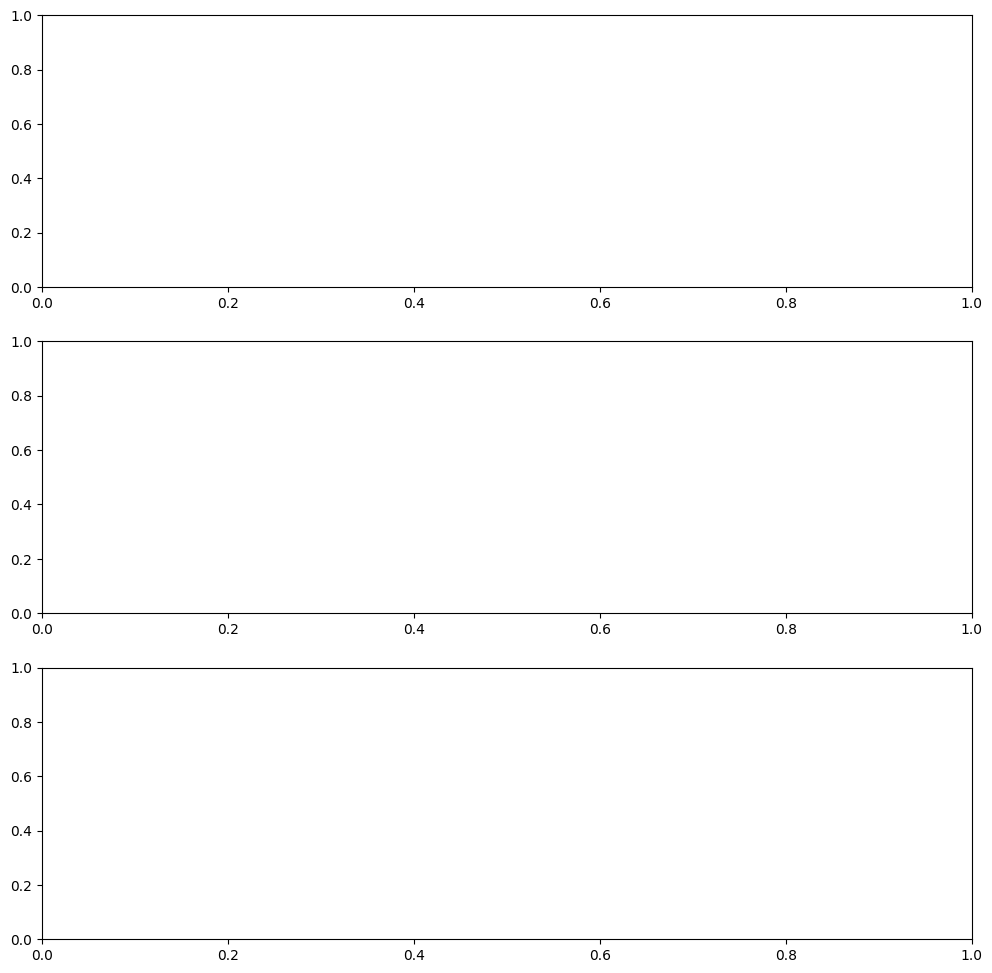

In [11]:


def main():
    """
    Главная функция для запуска демонстраций KAN
    """
    print("==== ДЕМОНСТРАЦИИ СЕТЕЙ КОЛМОГОРОВА-АРНОЛЬДА (KAN) ====")

    print("\nВыберите демонстрацию:")
    print("1. Формирование B-сплайн функций")
    print("2. Процесс обучения")
    print("3. Интерактивный процесс обучения")
    print("4. Эксперименты с нейронами и точками")
    print("5. Сравнение на разных наборах данных")

    try:
        choice = int(input("\nВведите число (1–5): "))
        if choice == 1:
            print("\n--- ФОРМИРОВАНИЕ B-СПЛАЙНОВ ---")
            print("Показывает, как KAN формирует сплайны для аппроксимации.")
            demo_kan_formation()
        elif choice == 2:
            print("\n--- ПРОЦЕСС ОБУЧЕНИЯ ---")
            print("Демонстрирует обучение KAN на синусоиде.")
            demo_kan_training_process()
        elif choice == 3:
            print("\n--- ИНТЕРАКТИВНОЕ ОБУЧЕНИЕ ---")
            print("Позволяет настроить параметры и наблюдать обучение.")
            demo_kan_training_process_interactive()
        elif choice == 4:
            print("\n--- ЭКСПЕРИМЕНТЫ С ПАРАМЕТРАМИ ---")
            print("Исследует влияние нейронов и точек на качество.")
            demo_experiment_neurons_points()
        elif choice == 5:
            print("\n--- СРАВНЕНИЕ НАБОРА ДАННЫХ ---")
            print("Показывает работу KAN на разных функциях.")
            demo_dataset_comparison()
        else:
            print("Выберите число от 1 до 5.")
    except ValueError:
        print("Введите целое число от 1 до 5.")

if __name__ == "__main__":
    main()